# Linear Regression_SLR ----------------------------

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [6]:
x = dataset[dataset.columns[5]] 
y = dataset[dataset.columns[2]] # Price

In [7]:
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:06:24   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

In [8]:
# predicting on X_test....This is a rare occasion to predict the TV using one IV
x_1 = dataset['sqft_living'].values.reshape(-1, 1)
y_1 = dataset['price'].values.reshape(-1, 1)
reg.fit(x_1, y_1)
y_pred = reg.predict(x_1)
y_pred.round(2)

array([[287555.07],
       [677621.83],
       [172499.4 ],
       ...,
       [242655.3 ],
       [405416.97],
       [242655.3 ]])

In [12]:
from sklearn.metrics import r2_score
r2_score(y_1, y_pred).round(3)

0.493

In [13]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ", mean_squared_error(y_1, y_pred).round(2)) 

Mean Squared Error:  68351286833.04


# **Linear Regression_MLR ----------------------------**

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [15]:
# Importing the dataset
data = pd.read_csv('/content/sample_data/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
data.shape

(50, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [19]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [20]:
data['State'].describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

In [21]:
# Label Encoding ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
# Can use other encoding techniques such as Factorization or One Hot Encoding
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['State'] = labelencoder.fit_transform(data['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [22]:
X = data[data.columns[0:4]]
y = data[data.columns[4]]

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X, y)
Linear_Regression.score(X, y).round(2) # Return the R^2 

0.95

In [24]:
print(Linear_Regression.coef_)
print(Linear_Regression.intercept_.round(2))

[  0.80575968  -0.02682585   0.02722767 -22.32057723]
50142.51


In [25]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           8.51e-29
Time:                        10:12:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.014e+04   6804.555     

In [26]:
# Predictions
predictions = Linear_Regression.predict(X)
predictions[0:2].round(2)

array([192502.76, 189182.67])

### **Build a Linear Regression predictive model**

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [29]:
# training a linear regression model on train
Linear_Regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Accuracy of the model
#Train Accuracy
print('Train Accuracy = ', (Linear_Regression.score(X_train, y_train).round(2))*100,'%')
# Test Accuracy....This is the one we consider when evaluating the model
print('Test Accuracy = ', (Linear_Regression.score(X_test, y_test).round(2))*100,'%')

Train Accuracy =  95.0 %
Test Accuracy =  94.0 %


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred).round(3)

0.939

In [31]:
# predicting on X_test
y_pred = Linear_Regression.predict(X_test)
y_pred.round(2)

array([103959.41, 132398.73, 133529.04,  72958.28, 179534.79, 115533.63,
        67476.96,  98504.36, 114789.16, 168972.22])

In [33]:
pd.DataFrame({'Actual': y_test.round(2), 'Predicted': y_pred.round(2)})

,Actual,Predicted
28,103282.38,103959.41
11,144259.40,132398.73
10,146121.95,133529.04
41,77798.83,72958.28
2,191050.39,179534.79
27,105008.31,115533.63
38,81229.06,67476.96
31,97483.56,98504.36
22,110352.25,114789.16
4,166187.94,168972.22


In [34]:
# evaluation using r-square
Linear_Regression.score(X_train,y_train).round(2)

0.95

In [ ]:
# calculating MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(2))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred).round(2))  
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)).round(2))

Mean Squared Error:  78413822.17
Mean Absolute Error:  7400.62
Root Mean Squared Error:  8855.16


In [ ]:
X3 = sm.add_constant(X_train)
est = sm.OLS(y_train, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           3.01e-22
Time:                        15:17:52   Log-Likelihood:                -421.17
No. Observations:                  40   AIC:                             852.3
Df Residuals:                      35   BIC:                             860.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.266e+04   8248.360     

In [ ]:
X_train

,R&D Spend,Administration,Marketing Spend,State
33,55493.95,103057.49,214634.81,1
35,46014.02,85047.44,205517.64,2
26,75328.87,144135.98,134050.07,1
34,46426.07,157693.92,210797.67,0
18,91749.16,114175.79,294919.57,1
7,130298.13,145530.06,323876.68,1
14,119943.24,156547.42,256512.92,1
45,1000.23,124153.04,1903.93,2
48,542.05,51743.15,0.00,2
29,65605.48,153032.06,107138.38,2


Text(0, 0.5, 'Profit')

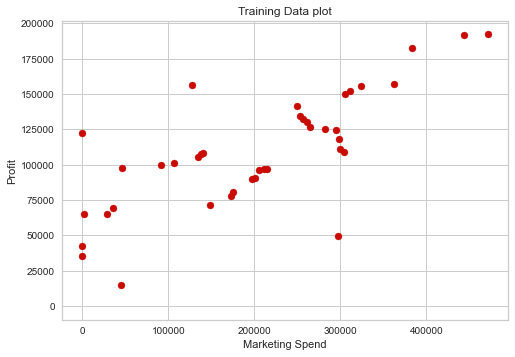

In [ ]:
# training data plot
x_plot = plt.scatter(X_train['Marketing Spend'], y_train, c='r')
plt.hlines(y=0, xmin= -1, xmax=1)
plt.title('Training Data plot')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

**Residuals Plot**

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y_test) and the predicted value (y_pred), i.e. the error of the prediction.

**Residual = Observed – Predicted**

Text(0, 0.5, 'Residuals')

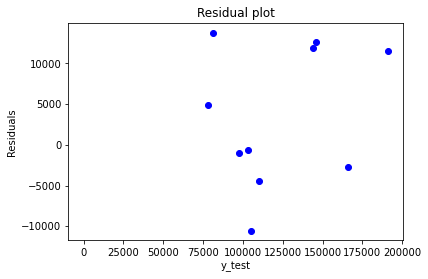

In [ ]:
# residual plot
x_plot = plt.scatter(y_test, (y_test - y_pred), c='b')
plt.hlines(y=0, xmin= -1, xmax=1)
plt.title('Residual plot')
plt.xlabel('y_test')
plt.ylabel('Residuals')

**Using Yellow Brick library**

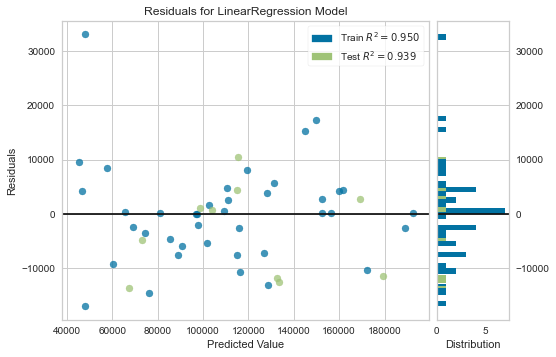

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(Linear_Regression)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    